In [ ]:
# ───────────────────────────────────────────────
# For Aug 2025 Fabric Notebook Contest
# Author  : Jai Rathinavel  
# LinkedIn: https://www.linkedin.com/in/jai-rathinavel  
# Github  : https://github.com/jai-rathinavel
# Year    : 2025  
# Month   : August
# ───────────────────────────────────────────────

<div style="font-size:18px; font-weight:bold; color:#FF0000;">
!! Create a Lakehouse or attach the notebook to your existing lakehouse and run the below cells
</div>

In [ ]:
%pip install semantic-link-labs==0.11.3

In [18]:
## Install if not available in your environment.

# %pip install semantic-link==0.11.2

In [4]:
import os
import requests 
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

### Helper funtion to save the .py file from github

In [5]:
#Function to save the dependent utils files from my github repo to the lakehouse's resources section

def save_from_github(github_url: str,path:str,file_name: str, force: bool = False):
    """
    Downloads a file from GitHub and saves it under the mentioned path
    
    Args:
        url (str): The URL to download from (use raw.githubusercontent.com).
        file_name (str): The name of the file to save locally.
        force (bool): If True, always download and overwrite the file.
    """
    url = github_url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    dest_path = f"{path}{file_name}"
    file_exists = os.path.exists(dest_path)
    if file_exists and not force:
        print(f"❗'{file_name}' already exists. Skipping download.")
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
    response = requests.get(url)
    if response.status_code == 200:
        with open(dest_path, 'wb') as f:
            f.write(response.content)
        if file_exists & force:
            print(f"📝 Overwritten the existing '{file_name}' with the latest file.")
        elif not file_exists :
            print(f"📥 Downloaded and saved '{file_name}'.")
    else:
        print(f"🔴 Failed to download. Status: {response.status_code}, URL: {url}")

In [6]:
# Saves the "custom_utils.py" file from my repository to the Notebooks resources section 
# Use path as "./builtin/" to save file to notebook resources or "./" to save to notebook environment

save_from_github( github_url="https://github.com/jai-rathinavel/my-packages/blob/main/sempy/custom_utils.py",path="./",file_name='custom_utils.py',force=True)

📥 Downloaded and saved 'custom_utils.py'.


### Importing and understanding the custom functions from the .py file 

###### I've developed a custom function, launch_enhanced_refresh_ui, which builds upon the capabilities of the SemPy framework in Microsoft Fabric. This utility provides an enhanced and more interactive user interface for managing and monitoring semantic model refreshes directly within the notebook environment.
###### 
###### Due to the extensive nature of the underlying code, I have not included the full function definition in this notebook to maintain clarity and focus.
###### 
###### For a detailed look at the source code and its implementation, please refer to my GitHub repository below.
###### [jai-rathinavel/packages](https://github.com/jai-rathinavel/packages/blob/main/sempy/custom_utils.py)


In [7]:
#Importing all the functions and libraries from custom_utils.py file

from custom_utils import get_model_details, launch_enhanced_refresh_ui

#If saved to Notebook's resources run the below

#from builtin.custom_utils import get_model_details, launch_enhanced_refresh_ui

In [8]:
#The below function is built on top of semantic-link (sempy) framework
#It extracts the tables and partitions across the models on workspace level.
#This function works only with Python Runtime.

help(get_model_details)

Help on function get_model_details in module builtin.custom_utils:

get_model_details(load_from_lakehouse: bool, table_name: str, workspace_list: list = None, only_premium_ws: bool = True) -> pandas.core.frame.DataFrame
    Function to extract all semantic models and its tables and partitions of the executing user.
    
    load_from_lakehouse: set to False will extract the latest information across all the semantic models and writes to lakehouse.
    table_name: name of the lakehouse table. 
    workspace_list: ['Workspace1','Workspace2'], if not provided it will extract all the accesible workspaces data
    only_premium_ws: by default set to True to fetch only premium workspaces



In [9]:
#The below function is built on top of semantic-link-labs (sempy_labs) framework
#Launches an Simple UI to handle refreshes within the notebook runtime. 

help(launch_enhanced_refresh_ui)

Help on function launch_enhanced_refresh_ui in module builtin.custom_utils:

launch_enhanced_refresh_ui(input_df, show_author: bool = True)
    Launches an interactive, enhanced UI for refreshing semantic models.
    This function creates a user interface for selecting workspaces, models, tables, and partitions from the provided DataFrame.
    It allows users to configure advanced refresh options such as refresh type, retry count, parallelism, commit mode, and policy application.
    The UI supports search and filtering for artifacts and dynamically updates available options based on user selections.
    Upon triggering the refresh, the function leverages sempy under the hood to trace the refresh activities.
    Parameters
    ----------
    input_df : pandas.DataFrame
        A DataFrame containing at least the columns: "Workspace Name", "Workspace Id", "Dataset Name", "Dataset Id", "Table Name", "Partition Name" and "Workspace Flag".
        This DataFrame is used to populate the dro

### Understanding the parameters

In [33]:
# Sample Code to extract datasets across all the premium workspaces.

result_df = get_model_details(load_from_lakehouse=False,table_name='Model Details',only_premium_ws=True)

#Took around 12mins & 21secs to extract 93 datasets (along with tables and partitions)

✅ Extracted 94 models info across 20 workspaces
🟢 'Model Details' table saved to the Lakehouse


In [26]:
# Sample Code to extract datasets from specific workspaces.

result_df = get_model_details(load_from_lakehouse=False,table_name='Model Details',workspace_list=['Financial Observations','Rest API'],only_premium_ws=False)

✅ Extracted 22 models info across 2 workspaces
🟢 'Model Details' table saved to the Lakehouse


In [34]:
# Sample Code to get all pre loaded data from the lakehouse (to eliminate redundant notebook runs)

result_df = get_model_details(load_from_lakehouse=True,table_name='Model Details')

✅ Found 94 models info from 20 workspaces


In [10]:
# Sample Code to get all pre loaded data from the lakehouse filtered for specific workspaces

result_df = get_model_details(load_from_lakehouse=True,table_name='Model Details',workspace_list=['Financial Observations','Rest API'])

✅ Found 22 models info from 2 workspaces


In [29]:
#Uncomment and run this helper to understand about refresh_semantic_model function from sempy_labs

#help(refresh_semantic_model)

### Populating the dataframe

In [17]:
#❗the UI function will not work without a valid dataframe❗

result_df = get_model_details(load_from_lakehouse=True,table_name='Model Details',only_premium_ws=True,workspace_list=['Financial Observations','Fabric Developers'])
display(result_df.tail())

✅ Found 6 models info from 2 workspaces


#### 📌 Notes (Please read before running the application:)
###### 1. If you don’t select any tables, all tables will be refreshed by default.
###### 2. If you select a table but don’t select any partitions, all partitions of that table will be refreshed.
###### 3. If you select specific partitions of a table, only those partitions will be refreshed.
###### 4. If no partitions are selected for a chosen table, then all partitions of that table will be refreshed.
###### 5. App may display "no such commm ...." junk values when the App is launched for first time, please re-run the cell to fix it.
###### 6. Dropdown values load depends on the size of the DataFrame. Larger DataFrames may cause a delay.

## 📷 Snapshot of the Notebook App

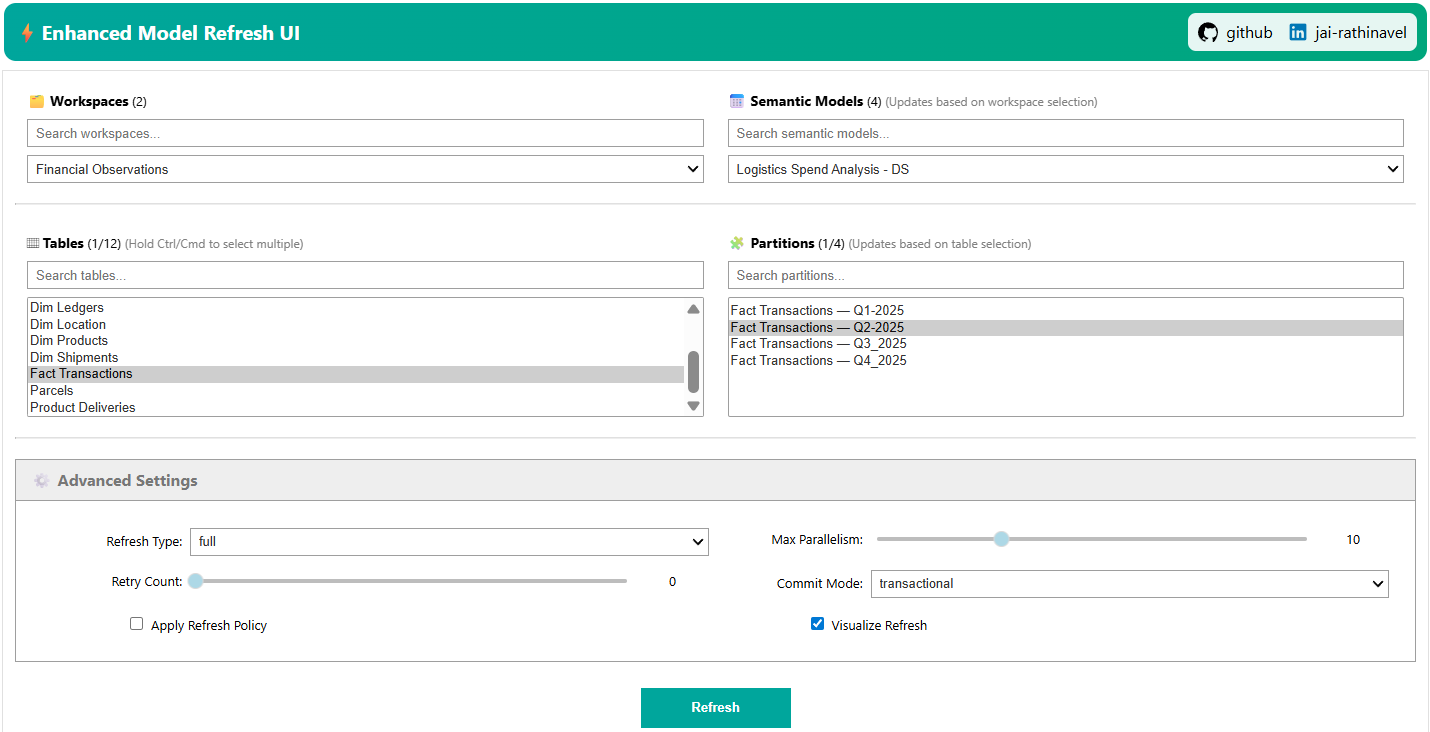


## ⚡Launching the Notebook Application

In [ ]:
#Passing the result_df dataframe from above  

launch_enhanced_refresh_ui(input_df=result_df)

#(Enable Visualize option to render the SSAS Trace output from sempy_labs package)

Refresh Completed
""


🟢 Refresh 'full' of the 'Logistics Spend Analysis - DS' semantic model within the 'Financial Observations' workspace is complete.


,Event Class,Event Subclass,Current Time,Text Data,Start Time,End Time,Duration,Cpu Time,Success,Integer Data,Object ID,Table Name,Partition Name,Start,End
0,ProgressReportEnd,ExecuteSql,2025-08-26 06:23:11.213,"let __AS_Query__ = #""Dim Ledgers"" , __AS_Table...",2025-08-26 06:22:58.933,2025-08-26 06:23:11.213,12282,0,Success,0,271,Dim Ledgers,Dim Ledgers,0.000000,12280.000000
1,ProgressReportEnd,ExecuteSql,2025-08-26 06:23:11.246,"let __AS_Query__ = #""Fact Transactions__SYSTEM...",2025-08-26 06:22:58.933,2025-08-26 06:23:11.246,12313,0,Success,0,6448,Fact Transactions,Q4_2025,0.000000,12313.000244
2,ProgressReportEnd,ExecuteSql,2025-08-26 06:23:11.260,"let __AS_Query__ = #""Dim Products"" , __AS_Tabl...",2025-08-26 06:22:58.933,2025-08-26 06:23:11.260,12329,0,Success,0,261,Dim Products,Dim Products,0.000000,12327.000000
3,ProgressReportEnd,ExecuteSql,2025-08-26 06:23:11.260,"let __AS_Query__ = Parcels , __AS_Table__ = Ta...",2025-08-26 06:22:58.933,2025-08-26 06:23:11.260,12329,0,Success,0,273,Parcels,Parcels,0.000000,12327.000000
4,ProgressReportEnd,Process,2025-08-26 06:23:11.260,Finished processing the '<oii>Q4_2025</oii>' p...,2025-08-26 06:23:11.246,2025-08-26 06:23:11.260,16,0,Success,0,6448,Fact Transactions,Q4_2025,12313.000244,12327.000000
5,ProgressReportEnd,Process,2025-08-26 06:23:11.260,Finished processing the '<oii>Dim Products</oi...,2025-08-26 06:23:11.260,2025-08-26 06:23:11.260,0,0,Success,0,261,Dim Products,Dim Products,12327.000000,12327.000000
6,ProgressReportEnd,Process,2025-08-26 06:23:11.260,Finished processing the '<oii>Parcels</oii>' p...,2025-08-26 06:23:11.260,2025-08-26 06:23:11.260,0,0,Success,0,273,Parcels,Parcels,12327.000000,12327.000000
7,ProgressReportEnd,Process,2025-08-26 06:23:11.356,Finished processing the '<oii>LocalDateTable_f...,2025-08-26 06:23:11.356,2025-08-26 06:23:11.356,0,0,Success,0,259,LocalDateTable_f773593f-ee55-4db4-8893-db27365...,LocalDateTable_f773593f-ee55-4db4-8893-db27365...,12423.000000,12423.000000
8,ProgressReportEnd,Process,2025-08-26 06:23:11.370,Finished processing the '<oii>LocalDateTable_8...,2025-08-26 06:23:11.370,2025-08-26 06:23:11.370,0,0,Success,0,260,LocalDateTable_8f792e35-133c-478a-bf8a-3b9bae1...,LocalDateTable_8f792e35-133c-478a-bf8a-3b9bae1...,12436.999756,12436.999756
9,ProgressReportEnd,Process,2025-08-26 06:23:11.386,Finished processing the '<oii>LocalDateTable_8...,2025-08-26 06:23:11.370,2025-08-26 06:23:11.386,16,0,Success,0,262,LocalDateTable_88767362-2182-4d84-86f4-f98a442...,LocalDateTable_88767362-2182-4d84-86f4-f98a442...,12436.999756,12452.999756
